# Ce script réalise des graphiques à partir des données des comptes des transports, i.e. nos agrégats de référence pour les transports : dépenses totales des ménages en carburants, et part de ces dépenses dans leur consommation

# Import de fonctions spécifiques à Openfisca indirect taxation et de bases de données des Comptes des Transports

In [5]:
import seaborn

seaborn.set_palette(seaborn.color_palette("Set2", 12))

%matplotlib inline

from ipp_macro_series_parser.agregats_transports.transports_cleaner import a3_a
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_line, graph_builder_line_percent


# Sélection des variables utilisées dans les graphiques

In [2]:
a3_a['to_be_used'] = 0
a3_a.loc[a3_a['index'] == u'0722 Carburants et lubrifiants (1)', 'to_be_used'] = 1
a3_a.loc[a3_a['index'] == u'0722 Carburants et lubrifiants (1)', 'index'] = u'Dépenses carburants et lubrifiants'

a3_a.loc[a3_a['index'] == '07 Transport', 'to_be_used'] = 1
a3_a.loc[a3_a['index'] == '07 Transport', 'index'] = u'Dépenses totales en transports'

a3_a.loc[a3_a['index'] == u'Ensemble des dépenses de consommation des ménages ', 'to_be_used'] = 1

depenses_menages_transports = a3_a[a3_a['to_be_used'] == 1]
depenses_menages_transports = depenses_menages_transports.drop(['to_be_used'] + ['categorie'], axis = 1)
depenses_menages_transports = depenses_menages_transports.set_index(['index'])
depenses_menages_transports = depenses_menages_transports.transpose()


# Calcul des parts des transports et des carburants dans les dépenses totales des ménages

In [3]:
depenses_menages_transports[u'part carburants dépenses totales'] = (
    depenses_menages_transports[u'Dépenses carburants et lubrifiants'] /
    depenses_menages_transports[u'Ensemble des dépenses de consommation des ménages ']
    )
depenses_menages_transports[u'part transports dépenses totales'] = (
    depenses_menages_transports[u'Dépenses totales en transports'] /
    depenses_menages_transports[u'Ensemble des dépenses de consommation des ménages ']
    )


# Réalisation des graphiques

Evolution des dépenses des ménages en carburants


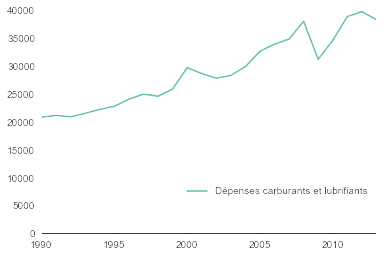

Evolution de la part des carburants et des transports dans les dépenses totales des ménages


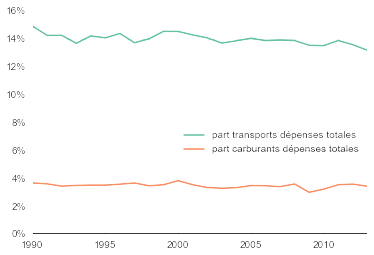

In [9]:
print('Evolution des dépenses des ménages en carburants')
graph_builder_line(depenses_menages_transports[u'Dépenses carburants et lubrifiants'])

print('Evolution de la part des carburants et des transports dans les dépenses totales des ménages')
graph_builder_line_percent(depenses_menages_transports[[u'part transports dépenses totales'] +
    [u'part carburants dépenses totales']], 1, 0.5)
